# importing required libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style("whitegrid")
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB


from sklearn.decomposition import PCA

from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score

import time

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline


SS = 10
MS =12

plt.rc('font', size = SS)
plt.rc('axes', titlesize = MS)
plt.rc('axes', labelsize = MS)
plt.rcParams['figure.dpi']=150


# uploading csv file

In [52]:
sdss_df = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv", skiprows=1)

# dimensional checking

In [53]:
sdss_df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237648704577142822,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3722360139651588096,STAR,-0.000009,3306,54922,491
1,1237648704577142859,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,363814405953054720,STAR,-0.000055,323,51615,541
2,1237648704577208477,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,323274319570429952,GALAXY,0.123111,287,52023,513
3,1237648704577273907,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3722365362331820032,STAR,-0.000111,3306,54922,510
4,1237648704577273909,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3722365912087633920,STAR,0.000590,3306,54922,512


In [54]:
sdss_df.shape

(10000, 18)

In [55]:
sdss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  int64  
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  uint64 
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 1.4+ MB


In [49]:
sdss_df.isna().sum()

#Table1    0
dtype: int64

In [50]:
sdss_df.describe()

,#Table1
count,10001
unique,893
top,155
freq,29


In [56]:
sdss_df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [ ]:
# data filtering 

In [57]:
sdss_df.columns.values

array(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun',
       'camcol', 'field', 'specobjid', 'class', 'redshift', 'plate',
       'mjd', 'fiberid'], dtype=object)

In [60]:
sdss_df.drop(['objid','run', 'rerun',
       'camcol', 'field', 'specobjid',], axis =1, inplace=True)

In [62]:
sdss_df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,3306,54922,512


In [63]:
#univariate analysis    

Text(0.5, 1.0, 'QSO')

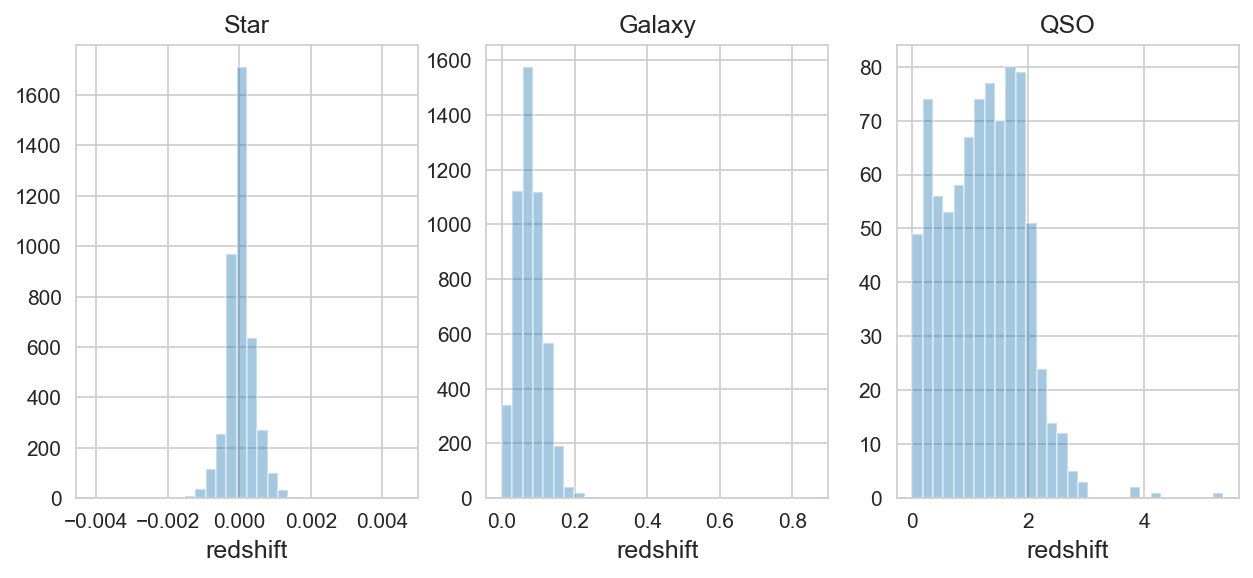

In [106]:
fig, axes = plt.subplots(1,3, figsize =(10, 4))
ax =sns.distplot(sdss_df[sdss_df['class']=='STAR'].redshift, bins =30, ax = axes[0], kde = False)
ax.set_title('Star')
ax =sns.distplot(sdss_df[sdss_df['class']=='GALAXY'].redshift, bins =30, ax= axes[1], kde = False)
ax.set_title('Galaxy')
ax =sns.distplot(sdss_df[sdss_df['class']=='QSO'].redshift, bins =30, ax= axes[2], kde = False)
ax.set_title('QSO')

In [105]:
# distribution of each class item can be seen  
STAR  has normal distribution
Galaxy has center appox 0.075 distributed
QSO has appox 0 to 3 distributed

by this we can know that star are more closer then the galaxy and QSO

In [110]:
!pip install seaborn

Text(0.5, 1.0, 'dec')

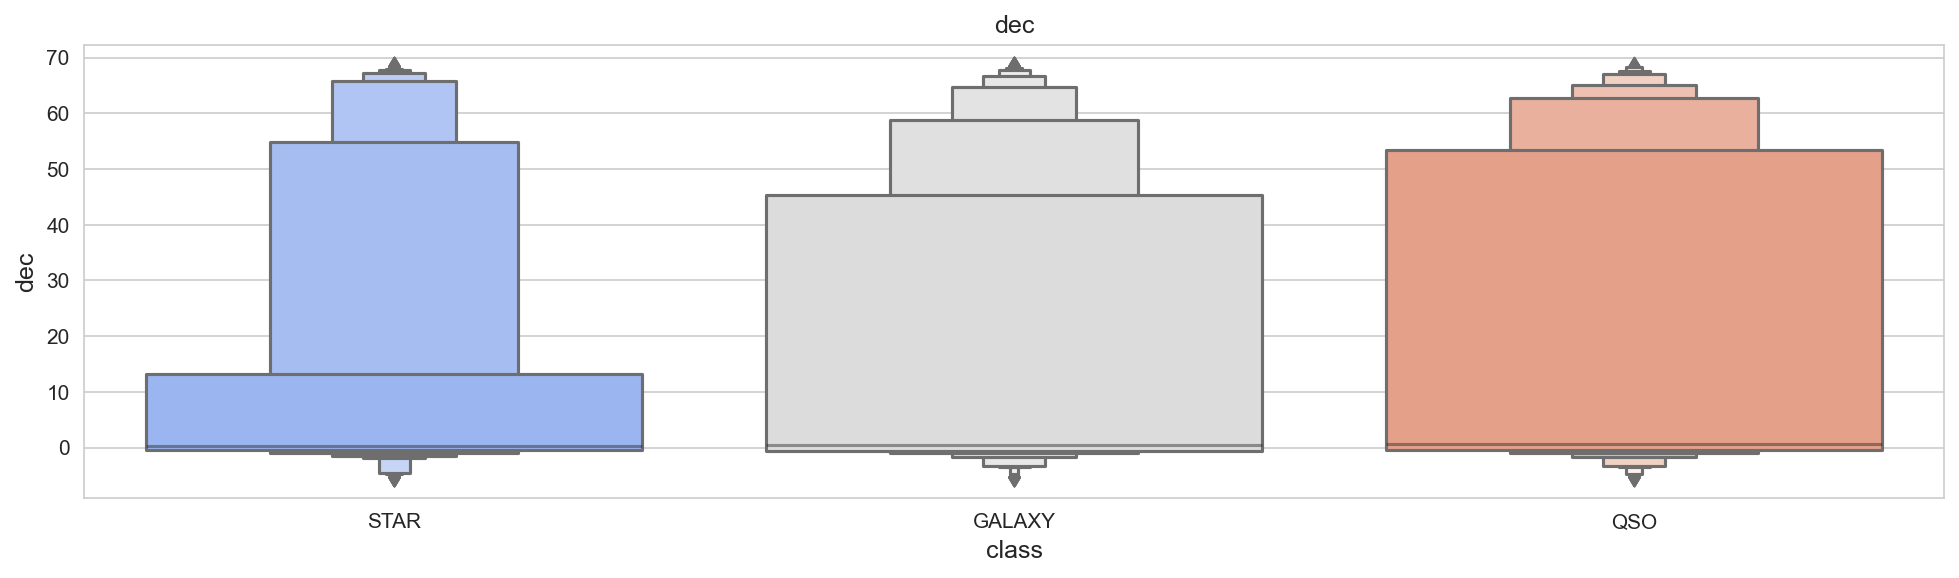

In [115]:
fig, axes =plt.subplots(1,1, figsize=(16,4))

ax = sns.boxenplot(x=sdss_df['class'], y =sdss_df['dec'], palette = 'coolwarm')
ax.set_title('dec')


In [117]:
#The fact that the distribution of dec values of galaxies und quasar objects is almost the same might indicate that one can find both galaxies and quasars at smiliar positions in the night sky.

In [118]:
#Recall: u, g, r, i, z represent the different wavelengths which are used to capture the observations.

#Let's find out how much they are correlated.

Text(0.5, 1.0, 'QSO')

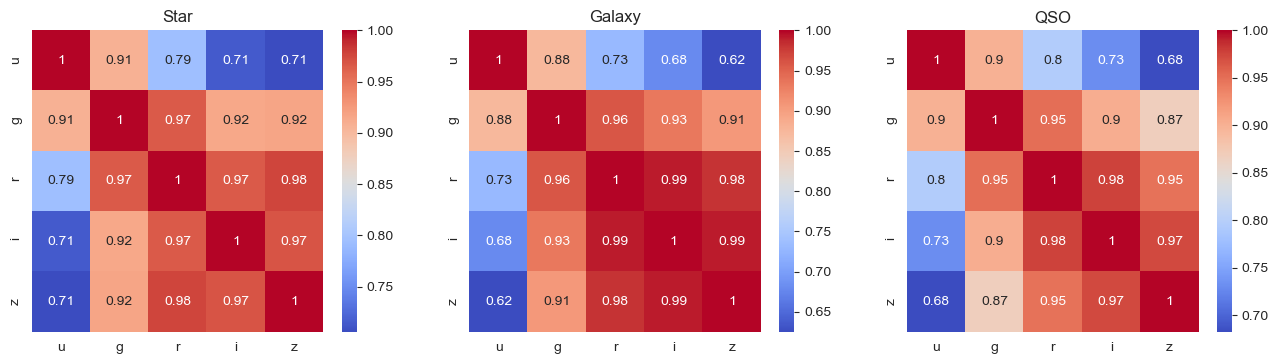

In [138]:
fig, axes = plt.subplots(1,3,figsize =(16,4))
fig.set_dpi(100)

ax =sns.heatmap(sdss_df[sdss_df['class']=='STAR'][['u','g','r','i','z']].corr(), ax =axes[0],annot = True, cmap='coolwarm', )
ax.set_title('Star')

ax =sns.heatmap(sdss_df[sdss_df['class']== 'GALAXY'][['u','g','r','i','z']].corr(), ax = axes[1], cmap='coolwarm',annot = True)
ax.set_title('Galaxy')

ax =sns.heatmap(sdss_df[sdss_df['class']=='QSO'][['u','g','r','i','z']].corr(), ax = axes[2], cmap ='coolwarm',annot = True)
ax.set_title('QSO')

In [139]:
#Therefore it is interesting to see that band 'u' is less correlated to the other bands.
#we can see - the correlation is roughly the same for every class...the different bands behave the same for the different classes!

C:\Users\CHANDU DHAGE\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Equatorial corrdinates')

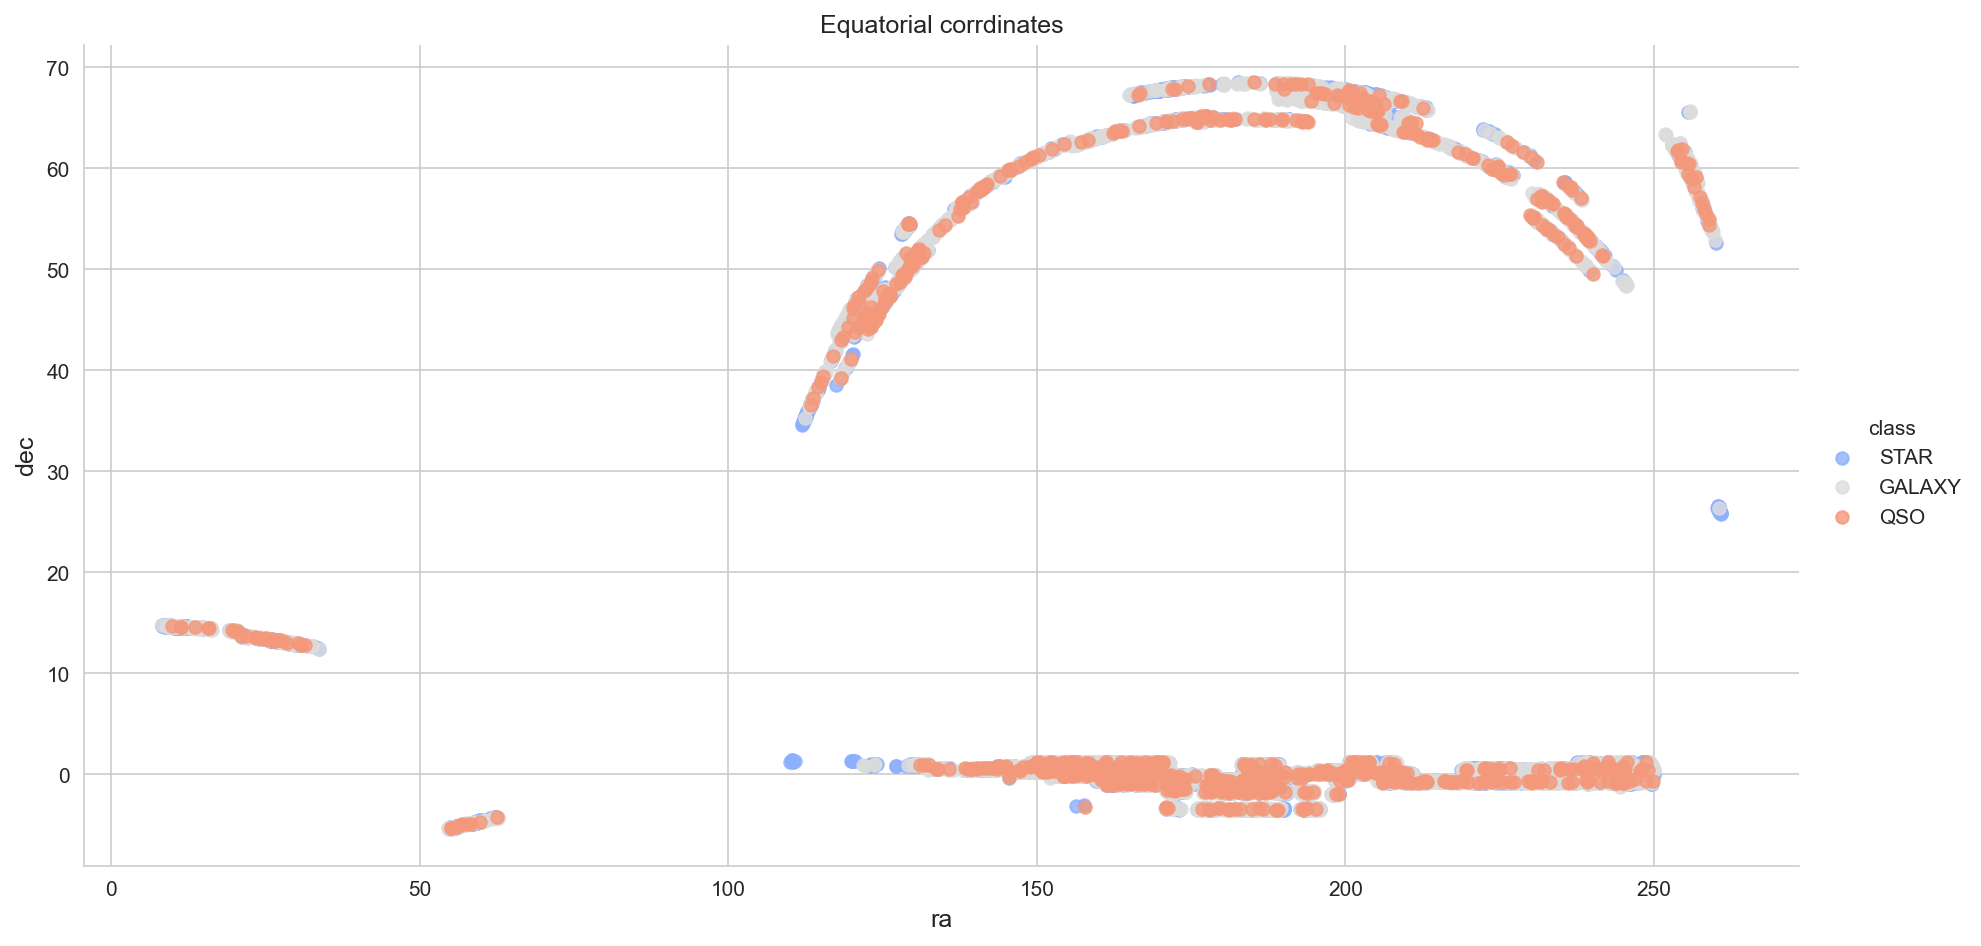

In [142]:
sns.lmplot(x='ra', y='dec', data=sdss_df, hue='class',fit_reg=False, palette='coolwarm', size=6, aspect=2)
plt.title('Equatorial corrdinates')

In [143]:
#As we can clearly observe the equatorial coordinates do not differ significantly between the 3 classes
#All SDSS images cover the same area of the sky. The plot above tells us that stars, galaxies and quasars are observed equally at all coordinates within this area. So whereever the SDSS "looks" - the chance of observing a star or galaxy or quasar is always the same.

In [144]:
#Feature Engineering
#We will now reduce the amount of dimensions by replacing the different bands 'u', 'g', 'r', 'i' and 'z' by a linear combination with only 3 dimensions using Principal Component Analysis.

In [161]:
sdss_df_fe = sdss_df


#converted class value into encode as 0,1,2
le = LabelEncoder()
y_encoded = le.fit_transform(sdss_df_fe['class'])
sdss_df_fe['class']=y_encoded

#Principle Component Analysis
pca = PCA(n_components=3)
ugriz = pca.fit_transform(sdss_df_fe[['u','g','r','i','z']])

#update dataframe sdss_df_fe and ugriz

sdss_df_fe = pd.concat((sdss_df_fe, pd.DataFrame(ugriz)),axis= 1)

#rename encoder 0 ,1, 2 == PCA_1

sdss_df_fe.rename({0:'PCA_1', 1 :' PCA_2', 2 : 'PCA_3'}, axis=1, inplace =True)

sdss_df_fe.drop(['u','g','r','i','z'], axis =1 , inplace =True)





In [164]:
sdss_df_fe.head()

,ra,dec,class,redshift,plate,mjd,fiberid,PCA_1,PCA_2,PCA_3
0,183.531326,0.089693,2,-0.000009,3306,54922,491,-1.507202,-1.377293,-0.265119
1,183.598371,0.135285,2,-0.000055,323,51615,541,-0.195758,-0.028410,-0.155695
2,183.680207,0.126185,0,0.123111,287,52023,513,1.297604,-0.590023,0.140338
3,183.870529,0.049911,2,-0.000111,3306,54922,510,-1.446117,0.566685,-0.009272
4,183.883288,0.102557,2,0.000590,3306,54922,512,-0.849271,1.287505,-0.397689


In [167]:
# create the model

# scaling data in (0,1)

scaler = MinMaxScaler()
sdss = scaler.fit_transform(sdss_df_fe.drop('class', axis =1))

In [170]:
x_train,x_test,y_train,y_test = train_test_split(sdss, sdss_df_fe['class'],test_size =0.33)


In [171]:
#model k- nearest neighbors

In [180]:
knn = KNeighborsClassifier()

import time

training_start = time.perf_counter()

knn.fit(x_train,y_train)

training_end = time.perf_counter()

prediction_start = time.perf_counter()

preds  = knn.predict(x_test)

prediction_end = time.perf_counter()

acc_knn = (preds == y_test).sum().astype(float)/len(preds)*100

knn_train_time = training_end - training_start

knn_prediction_time = prediction_end - prediction_start

print("knn classifier accuracy is : %3.2f" % (acc_knn))

knn classifier accuracy is : 92.15


In [184]:
print("Time consumed for training : %4.3f seconds" % (knn_train_time))

Time consumed for training : 0.026 seconds


In [186]:
print("Time consumed for training : %6.5f seconds" % (knn_prediction_time))

Time consumed for training : 0.26472 seconds


In [187]:
### naive bayes

In [213]:
from sklearn.preprocessing import MaxAbsScaler
scaler_gnb = MaxAbsScaler()
sdss = scaler_gnb.fit_transform(sdss_df_fe.drop('class', axis = 1))
x_trian_gnb,x_test_gnb,y_train_gnb,y_test_gnb = train_test_split(sdss, sdss_df_fe['class'], test_size =0.33)


gnb = GaussianNB()

trianing_start = time.perf_counter()

gnb.fit(x_trian_gnb, y_train_gnb)

training_end = time.perf_counter()

prediction_start = time.perf_counter()

pred = gnb.predict(x_test_gnb)

prediction_end = time.perf_counter()

acc_gnb = (pred == y_test_gnb).sum().astype(float)/ len(preds)*100

gbn_train_time = training_end - trianing_start

gbn_pred_time = prediction_end -  prediction_start 

print(acc_gnb)

print(gbn_train_time)

print(gbn_pred_time)



from sklearn import metrics 

from sklearn.metrics import accuracy_score

#other method for accuracy check
score_1 = metrics.r2_score(y_test_gnb, pred)


print(score_1)

97.93939393939394
0.006231499999557855
0.0017631999999139225
0.9653166432816761


In [199]:
# xgboost classifier

In [219]:
xgb = XGBClassifier(n_estimators =100)

trianing_start = time.perf_counter()

xgb.fit(x_train, y_train)

training_end = time.perf_counter()

prediction_start = time.perf_counter()
pred = xgb.predict(x_test)
prediction_end = time.perf_counter()

acc_xgb = (pred == y_test).sum().astype(float)/len(pred)*100

score_2 = metrics.r2_score(y_test, pred)

print(score_2)

print(acc_xgb)

C:\Users\CHANDU DHAGE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9883424933075314
99.3030303030303


In [223]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, x_train,y_train, cv =10, scoring = 'accuracy')
print('scores:', scores)
print('Mean:', scores.mean())
print("standarad Deviation", scores.std())

C:\Users\CHANDU DHAGE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\CHANDU DHAGE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\CHANDU DHAGE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\CHANDU DHAGE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\CHANDU DHAGE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\CHANDU DHAGE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\CHANDU DHAGE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\CHANDU DHAGE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\CHANDU DHAGE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\CHANDU DHAGE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
scores: [0.99402985 0.98656716 0.99552239 0.99253731 0.98955224 0.99402985
 0.99701493 0.99402985 0.99552239 0.99552239]
Mean: 0.9934328358208955
standarad Deviation 0.0029999628719763875
